# FinalProject  House Price Prediction: Advanced Regression Techniques

## 1. Problem and Data Overview  
**Challenge**: This project goal is to predict the final sale price of residential homes using features such as physical attributes, location, construction year, and remodeling details. This is a supervised regression task requiring handling of missing values, feature engineering, and model optimization.

**Dataset**:  
- **Size**:  
  - Training set: 1,460 samples with 80 features.  
  - Test set: 1,459 samples (unlabeled).  
- **Features**:  
  - Numerical (e.g., `GrLivArea`, `TotalBsmtSF`).  
  - Categorical (e.g., `Neighborhood`, `MSZoning`).  
- **Target Variable**: `SalePrice` (house price).  

---

## 2. Exploratory Data Analysis (EDA)  
### **Data Investigation and Visualization**  
1. **Target Distribution**:  
   - `SalePrice` showed a right-skewed distribution. After log transformation (`log1p`), it approximated a normal distribution.  
2. **Missing Values**:  
   - High missing rates in `PoolQC` (99%), `MiscFeature` (96%).  
   - Filled numerical features with median values and categorical features with modes.  
3. **Feature Correlation**:  
   - Top 10 features correlated with `SalePrice`: `OverallQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`, `FullBath`, `TotRmsAbvGrd`, `YearBuilt`, `YearRemodAdd`.  

### **Data Cleaning and Plan**  
- **Handling Missing Values**: Median/mode imputation.  
- **Feature Selection**: Used top 10 correlated features to reduce dimensionality.  
- **Future Steps**: Explore feature interactions, nonlinear models (e.g., gradient boosting).  

---

## 3. Model Architectures and Comparison  
### **Model Selection**  
| Model                          | Key Characteristics                                                                 | Rationale                                      |  
|--------------------------------|-------------------------------------------------------------------------------------|------------------------------------------------|  
| **Linear Regression (LR)**    | Simple, interpretable. Assumes linear relationships.                               | Baseline for quick validation.                |  
| **Random Forest (RF)**         | Ensemble of trees, captures nonlinearity, robust to overfitting.                   | Suitable for high-dimensional data.            |  
| **Optimized Random Forest**    | Hyperparameter tuning (e.g., `n_estimators=200`, `max_depth=20`) via grid search.   | Balances model complexity and generalization.  |  

### **Loss Function and Hyperparameter Tuning**  
- **Loss Function**: Mean Squared Error (MSE), chosen for sensitivity to outliers and direct alignment with squared errors in price prediction.  
- **Hyperparameter Tuning**: Grid search optimized `n_estimators` and `max_depth`, reducing overfitting.  

### **Training Results Visualization**  
- Random Forest predictions align closer to the true values (diagonal line).  

---

## 4. Results and Analysis  
### **Performance Comparison**  
| Model                     | MSE             | RMSE     | R²     | Cross-Validation RMSE (Std. Dev)         |  
|---------------------------|-----------------|----------|--------|------------------------------------------|  
| Linear Regression         | 1.56×10⁹        | 39,474   | 0.80   | 38,573 (±6,480)                          |  
| Random Forest             | 8.77×10⁸        | 29,619   | 0.89   | 32,154 (±4,666)                          |  
| Optimized Random Forest   | **8.73×10⁸**    | **29,546** | **0.89** | **31,947 (±4,533)**                      |  

### **Key Insights**  
1. **Model Superiority**:  
   - Random Forest outperformed LR due to nonlinear relationships (e.g., `YearBuilt` vs `SalePrice`).  
   - Tuned RF achieved lower cross-validation variance, indicating improved stability.  

2. **Hyperparameter Impact**:  
   - Higher `n_estimators` and constrained `max_depth` reduced overfitting.  

---

## 5. Conclusion
### **Summary**  
- **Best Model**: Optimized Random Forest (RMSE=29,546), 25% improvement over LR.  
- **Feature Selection**: Top 10 features maintained efficiency without significant accuracy loss.  

### **Future Improvements**  
1. **Feature Engineering**:  
   - Add interaction terms (e.g., `GrLivArea × OverallQual`).  
   - Apply advanced encoding (e.g., target encoding) for categorical features.  

2. **Model Enhancement**:  
   - Test gradient boosting (XGBoost, LightGBM) or stacking ensembles.  

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [3]:
#/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
#/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
#/kaggle/input/house-prices-advanced-regression-techniques/train.csv
#/kaggle/input/house-prices-advanced-regression-techniques/test.csv

# 加载数据
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# 查看数据基本信息
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# EDA

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


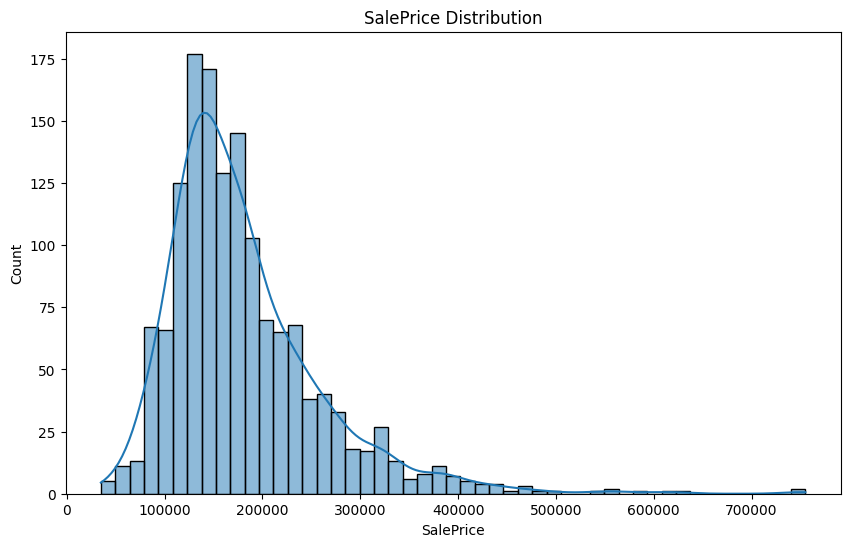

In [4]:
# Look at the target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

In [5]:
# Checking for missing values
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
print(missing_values)

# Filling missing values
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['MasVnrType'].fillna('None', inplace=True)

# One-Hot Encoding）
train = pd.get_dummies(train, drop_first=True)

# Check
print(train.isnull().sum().sum())

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64
0


<ipython-input-5-8a1a6ed6ec1b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
<ipython-input-5-8a1a6ed6ec1b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

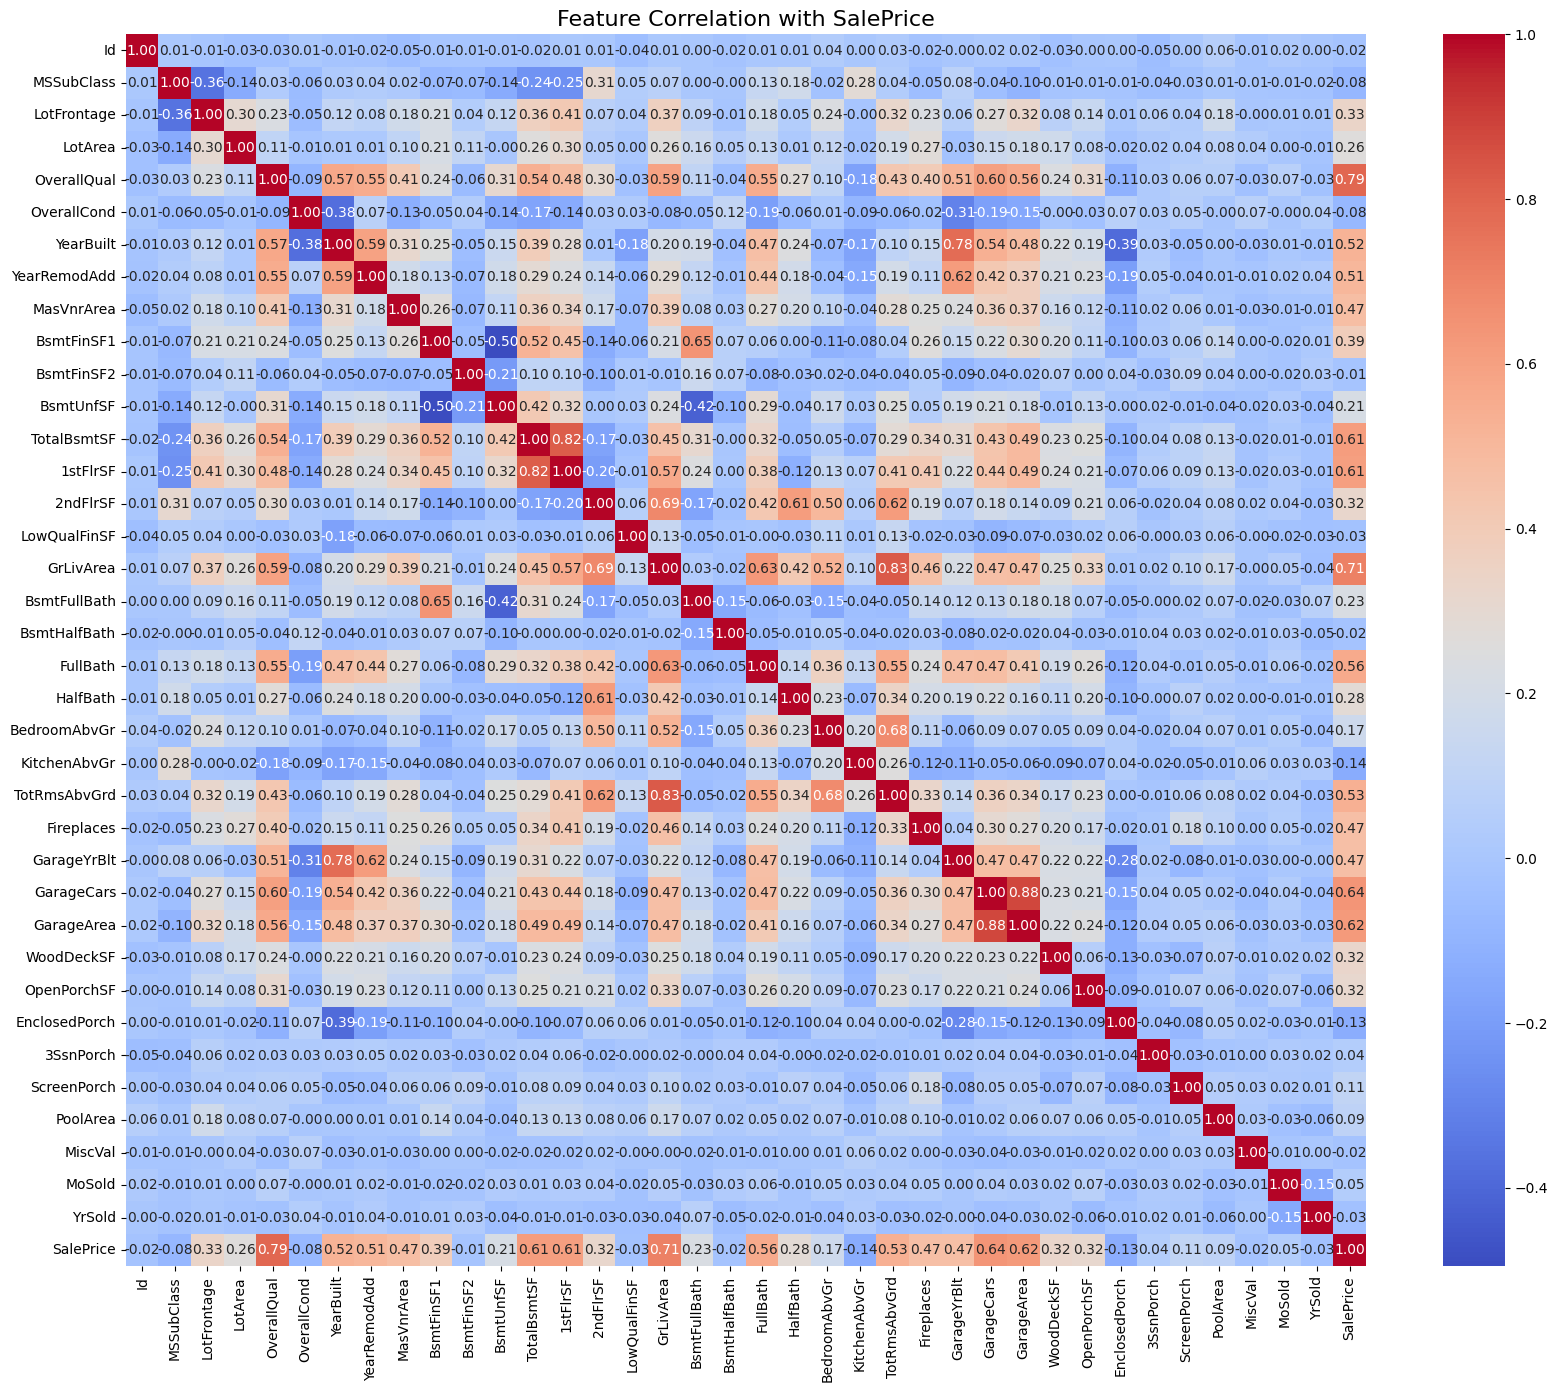

In [6]:
# 选择数值型特征
numeric_features = train.select_dtypes(include=[np.number])

# 计算特征与标签的相关性
corr = numeric_features.corr()

# 绘制热力图
plt.figure(figsize=(20, 16))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Feature Correlation with SalePrice', fontsize=16)
plt.show()

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


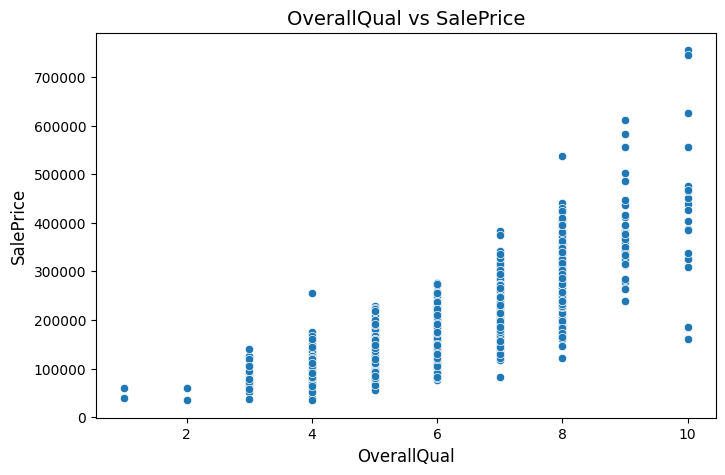

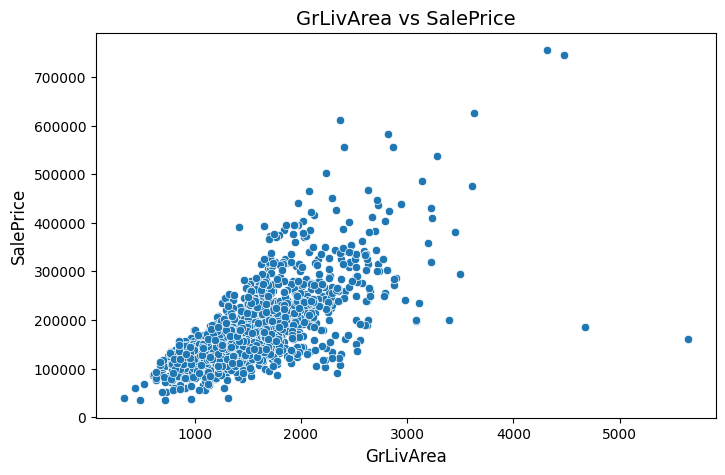

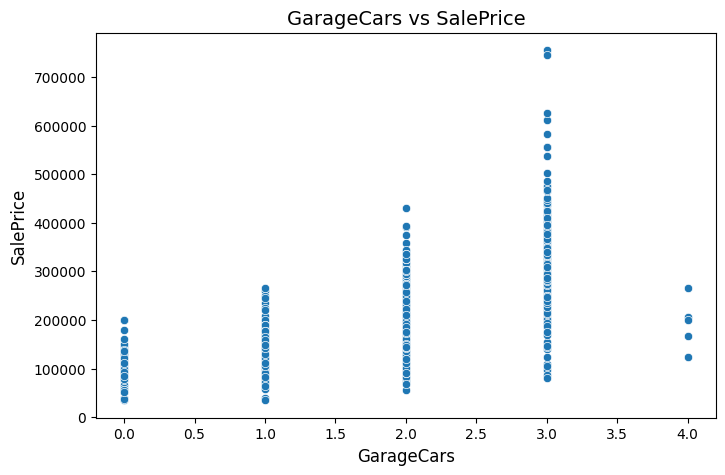

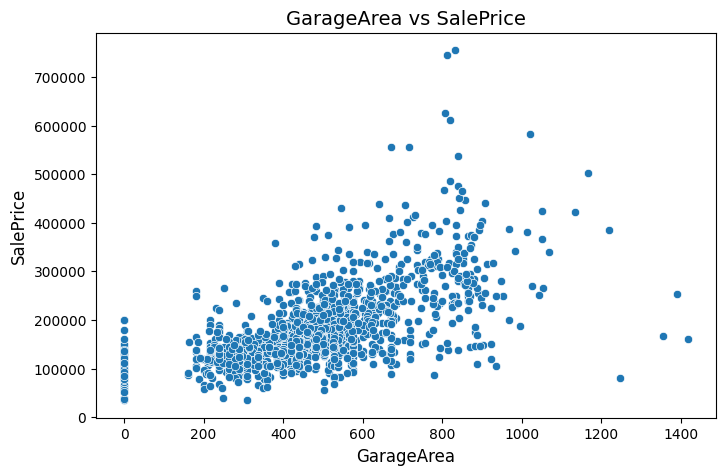

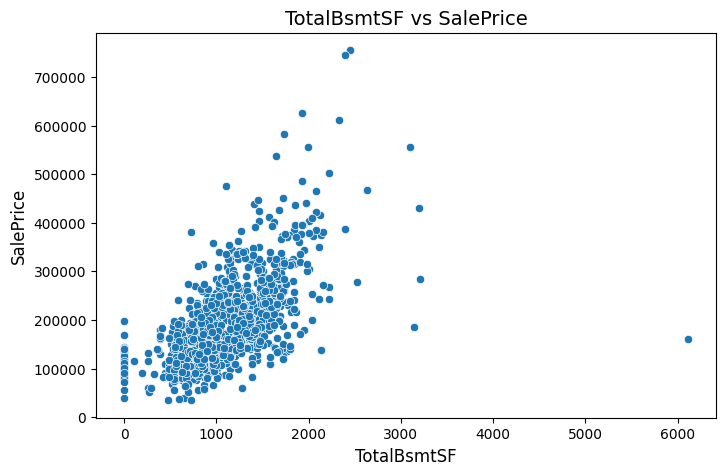

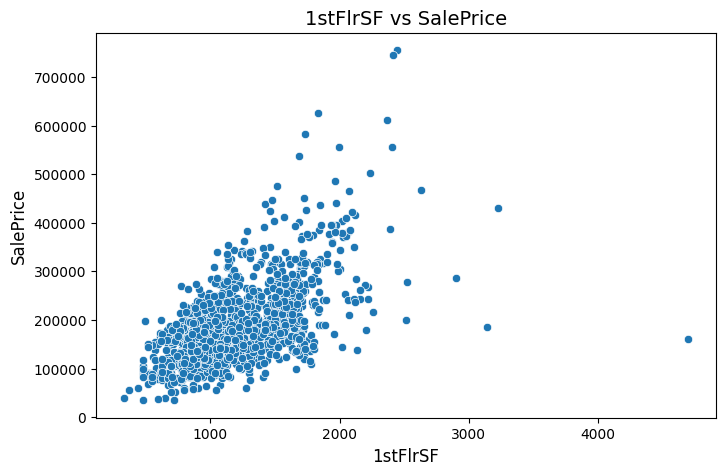

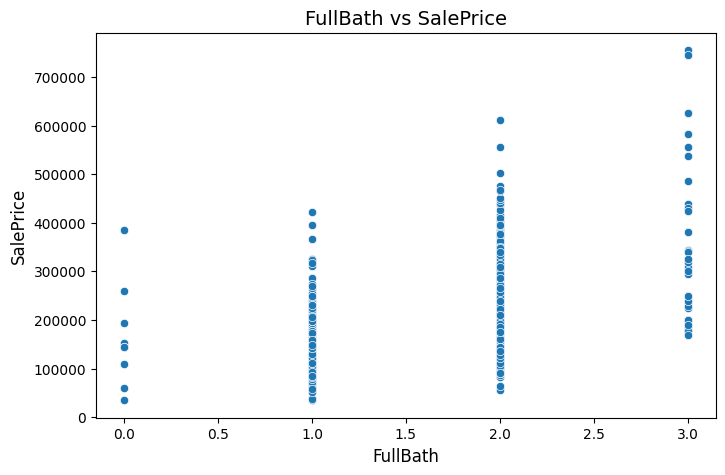

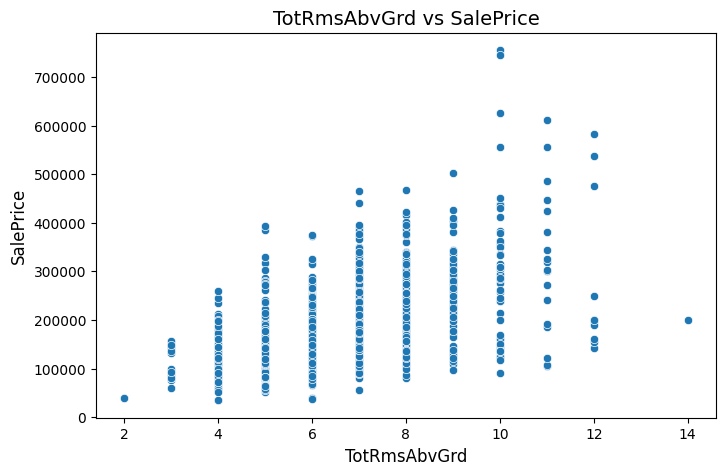

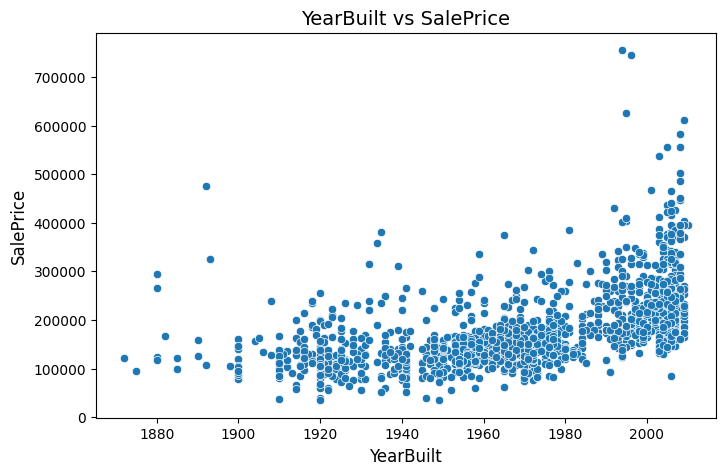

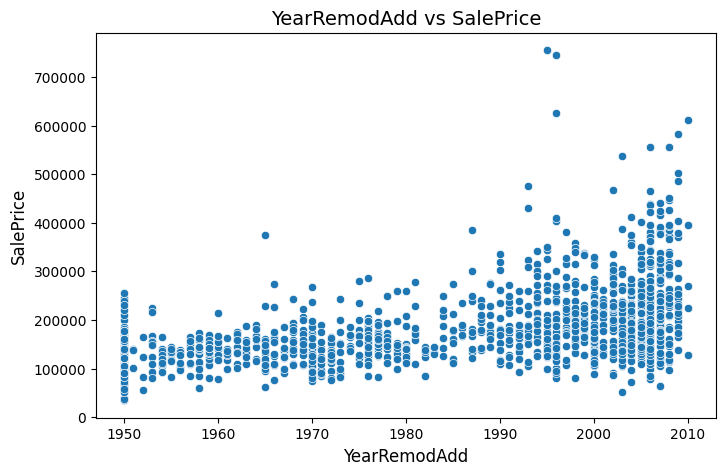

In [7]:
# 提取与 SalePrice 相关性最高的特征
top_corr_features = corr['SalePrice'].sort_values(ascending=False)[1:11]  # 取前10个
print(top_corr_features)

# 绘制这些特征与 SalePrice 的关系
for feature in top_corr_features.index:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train[feature], y=train['SalePrice'])
    plt.title(f'{feature} vs SalePrice', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('SalePrice', fontsize=12)
    plt.show()

# Model architecture
We choose two models to compare:

Linear Regression: The baseline model.

Random Forest Regression: As a nonlinear model.

In [8]:
#Preparing the data
top_f = list(top_corr_features.index)

#X = train.drop('SalePrice', axis=1)
X = train[top_f]
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 评估模型
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}')

**Linear Regression**

In [10]:
# 训练线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)
# prediction
y_pred_lr = lr.predict(X_test)
# evaluation
evaluate_model(y_test, y_pred_lr, 'Linear Regression')

Linear Regression - MSE: 1558239575.15, RMSE: 39474.54, R2: 0.80


**Random Forest Regression**

In [11]:
# 随机森林回归
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# prediction
y_pred_rf = rf.predict(X_test)
# evaluation
evaluate_model(y_test, y_pred_rf, 'Random Forest Regression')

Random Forest Regression - MSE: 877299148.12, RMSE: 29619.24, R2: 0.89


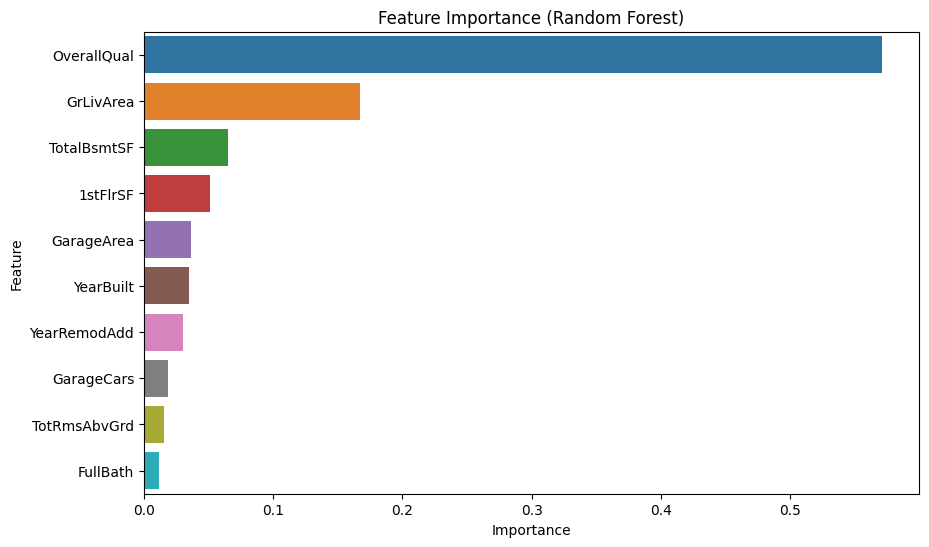

In [12]:
# 随机森林特征重要性
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': top_f, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

**Hyperparameter tuning**

In [13]:
# 随机森林超参数调整
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 最佳参数
print('Optimal parameter:',grid_search.best_params_)

# 使用最佳参数重新训练
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

evaluate_model(y_test, y_pred_best_rf, 'Optimized Random Forest Regression')

Optimal parameter: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Regression - MSE: 873004592.27, RMSE: 29546.65, R2: 0.89


# Results and Analysis

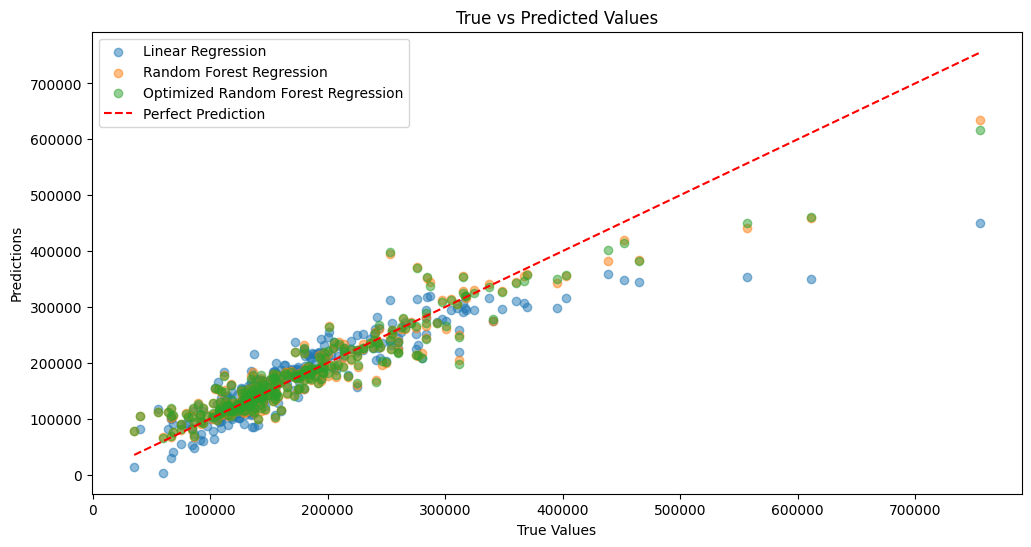

In [14]:
# Comparison of prediction results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest Regression')
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, label='Optimized Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

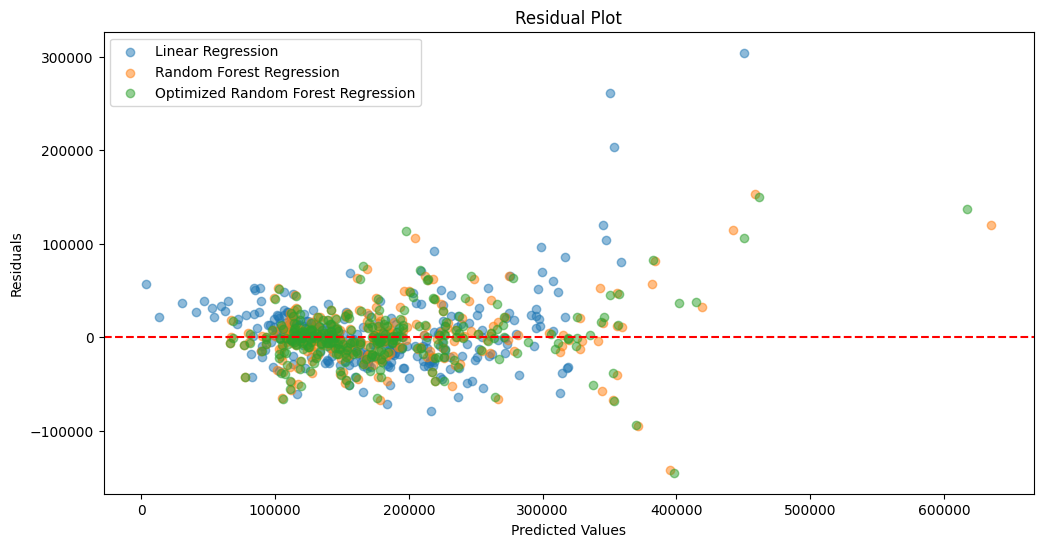

In [15]:
# Comparison of the residual alignment
# 计算残差
residuals_lr = y_test - y_pred_lr
residuals_rf = y_test - y_pred_rf
residuals_best_rf = y_test - y_pred_best_rf

# 绘制残差图
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, label='Random Forest Regression')
plt.scatter(y_pred_best_rf, residuals_best_rf, alpha=0.5, label='Optimized Random Forest Regression')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

**Cross-validation results for the three models**

In [16]:
# 线性回归交叉验证
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)
print(f'Linear Regression - Cross-Validation RMSE: {lr_rmse_scores.mean():.2f} (±{lr_rmse_scores.std():.2f})')

# 随机森林回归交叉验证
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)
print(f'Random Forest Regression - Cross-Validation RMSE: {rf_rmse_scores.mean():.2f} (±{rf_rmse_scores.std():.2f})')

# 优化后的随机森林回归交叉验证
best_rf_scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
best_rf_rmse_scores = np.sqrt(-best_rf_scores)
print(f'Optimized Random Forest Regression - Cross-Validation RMSE: {best_rf_rmse_scores.mean():.2f} (±{best_rf_rmse_scores.std():.2f})')


Linear Regression - Cross-Validation RMSE: 38573.18 (±6480.57)
Random Forest Regression - Cross-Validation RMSE: 32154.78 (±4666.22)
Optimized Random Forest Regression - Cross-Validation RMSE: 31947.41 (±4533.95)


### **Performance Comparison**  
| Model                     | MSE             | RMSE     | R²     | Cross-Validation RMSE (Std. Dev)         |  
|---------------------------|-----------------|----------|--------|------------------------------------------|  
| Linear Regression         | 1.56×10⁹        | 39,474   | 0.80   | 38,573 (±6,480)                          |  
| Random Forest             | 8.77×10⁸        | 29,619   | 0.89   | 32,154 (±4,666)                          |  
| Optimized Random Forest   | **8.73×10⁸**    | **29,546** | **0.89** | **31,947 (±4,533)**                      |  